<a href="https://colab.research.google.com/github/RiktikaTalukder/SkillMorph/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [23]:
print("Reading the real cancer dataset...")
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/Dataset/Breast_Cancer_Wisconsin_Dataset.csv')

print(f"Dataset loaded! We have data from {len(data)} real patients")
print(f"Each patient has {len(data.columns)-2} medical measurements")

# Show first few patients
print("\nFirst 5 patients in our dataset:")
print(data[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'area_mean','smoothness_mean', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst']].head())

# Understand diagnosis column
print(f"\nUnderstanding Diagnosis:")
diagnosis_counts = data['diagnosis'].value_counts()
print(f"M (Malignant = Dangerous Cancer):  {diagnosis_counts['M']} patients")
print(f"B (Benign = Harmless Cancer):      {diagnosis_counts['B']} patients")
print(f"Total patients:                    {len(data)} patients")

Reading the real cancer dataset...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded! We have data from 569 real patients
Each patient has 31 medical measurements

First 5 patients in our dataset:
         id diagnosis  radius_mean  texture_mean  area_mean  smoothness_mean  \
0    842302         M        17.99         10.38     1001.0          0.11840   
1    842517         M        20.57         17.77     1326.0          0.08474   
2  84300903         M        19.69         21.25     1203.0          0.10960   
3  84348301         M        11.42         20.38      386.1          0.14250   
4  84358402         M        20.29         14.34     1297.0          0.10030   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           

# **Prepare Data**

In [24]:
print("Computers only understand numbers, not letters!")
print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")

# Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})
print("Conversion completed!")

# Select only the most important features (make it simple!)
important_features = [
    'radius_mean',      # Size of tumor
    'texture_mean',     # Surface texture
    'area_mean',        # Area of tumor
    'smoothness_mean',  # How smooth the surface is
    'compactness_mean', # How compact the tumor is
    'texture_worst',
    'perimeter_worst',
    'area_worst',
    'smoothness_worst',
    'compactness_mean'
]


# Create simple dataset
X = data[important_features]  # Patient measurements
y = data['diagnosis_numeric']  # Malignant (1) or Benign (0)

print(f"\nData prepared:")
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")

Computers only understand numbers, not letters!
Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
Conversion completed!

Data prepared:
X (measurements): (569, 10)
y (diagnosis): (569,)


# **Train and Test Split**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

# Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.head())

Training: 455 patients (computer will learn from these)
Testing:  114 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
     radius_mean  texture_mean  area_mean  smoothness_mean  compactness_mean  \
412        9.397         21.68      268.8          0.07969           0.06053   
461       27.420         26.27     2501.0          0.10840           0.19880   
532       13.680         16.33      575.5          0.09277           0.07255   
495       14.870         20.21      680.9          0.09587           0.08345   
13        15.850         23.95      782.7          0.08401           0.10020   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
412          27.99            66.61       301.0            0.1086   
461          31.37           251.20      4254.0            0.1357   
532          20.20           101.60       773.4            0.1264   
495          28.48           103.90       783.6            0.1216   
13        

# **Max depth = 5**






Skill Morph Doctor Accuracy: 0.947 (94.7%)
GOOD! Our Skill Morph doctor performs well!

Let's check some predictions with confidence:
Patient | Actual      | Skill Morph Predicted | Confidence | Correct?
----------------------------------------------------------------------
      1 | Benign      | Benign            |     99.2%  | ✅
      2 | Malignant   | Malignant         |    100.0%  | ✅
      3 | Malignant   | Malignant         |    100.0%  | ✅
      4 | Benign      | Benign            |     99.2%  | ✅
      5 | Malignant   | Malignant         |    100.0%  | ✅
      6 | Malignant   | Malignant         |    100.0%  | ✅
      7 | Malignant   | Malignant         |    100.0%  | ✅
      8 | Benign      | Benign            |     99.2%  | ✅
      9 | Benign      | Malignant         |    100.0%  | ❌
     10 | Malignant   | Malignant         |    100.0%  | ✅


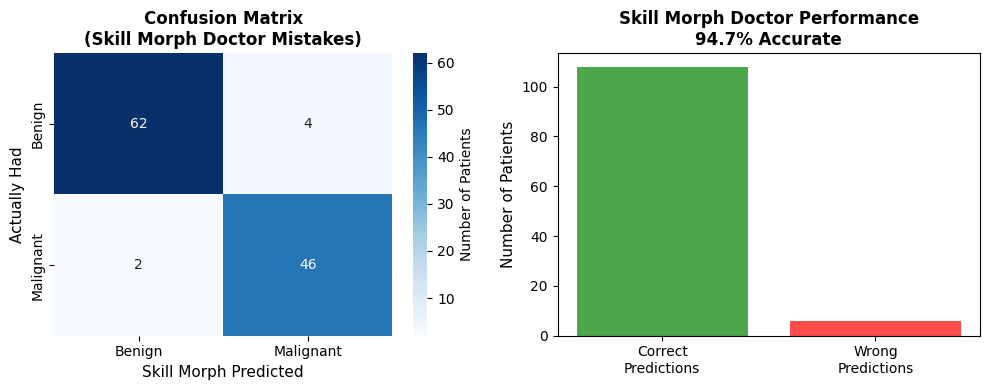

In [26]:
# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=5,  # Keep it simple - not too complex
    random_state=20
)

# Train the model
skillmorph_doctor.fit(X_train, y_train)

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

# Show some predictions vs reality with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:17} | {confidence:8.1f}%  | {correct}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

# **Max depth = 6**


Skill Morph Doctor Accuracy: 0.939 (93.9%)
GOOD! Our Skill Morph doctor performs well!

Let's check some predictions with confidence:
Patient | Actual      | Skill Morph Predicted | Confidence | Correct?
----------------------------------------------------------------------
      1 | Benign      | Benign            |     99.6%  | ✅
      2 | Malignant   | Malignant         |    100.0%  | ✅
      3 | Malignant   | Malignant         |    100.0%  | ✅
      4 | Benign      | Benign            |     93.3%  | ✅
      5 | Malignant   | Malignant         |    100.0%  | ✅
      6 | Malignant   | Malignant         |    100.0%  | ✅
      7 | Malignant   | Malignant         |    100.0%  | ✅
      8 | Benign      | Benign            |     93.3%  | ✅
      9 | Benign      | Malignant         |    100.0%  | ❌
     10 | Malignant   | Malignant         |    100.0%  | ✅


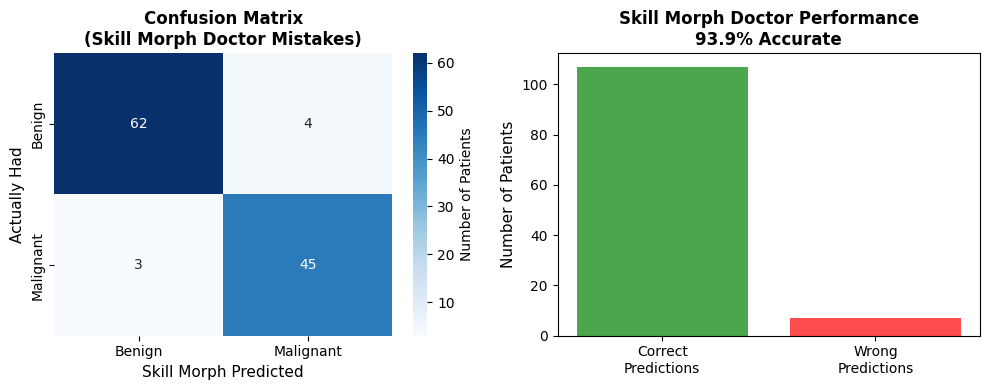

In [27]:
# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=6,  # Keep it simple - not too complex
    random_state=20
)

# Train the model
skillmorph_doctor.fit(X_train, y_train)

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

# Show some predictions vs reality with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:17} | {confidence:8.1f}%  | {correct}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

# **Max depth = 7**


Skill Morph Doctor Accuracy: 0.921 (92.1%)
GOOD! Our Skill Morph doctor performs well!

Let's check some predictions with confidence:
Patient | Actual      | Skill Morph Predicted | Confidence | Correct?
----------------------------------------------------------------------
      1 | Benign      | Benign            |    100.0%  | ✅
      2 | Malignant   | Malignant         |    100.0%  | ✅
      3 | Malignant   | Malignant         |    100.0%  | ✅
      4 | Benign      | Benign            |    100.0%  | ✅
      5 | Malignant   | Malignant         |    100.0%  | ✅
      6 | Malignant   | Malignant         |    100.0%  | ✅
      7 | Malignant   | Malignant         |    100.0%  | ✅
      8 | Benign      | Benign            |    100.0%  | ✅
      9 | Benign      | Malignant         |    100.0%  | ❌
     10 | Malignant   | Malignant         |    100.0%  | ✅


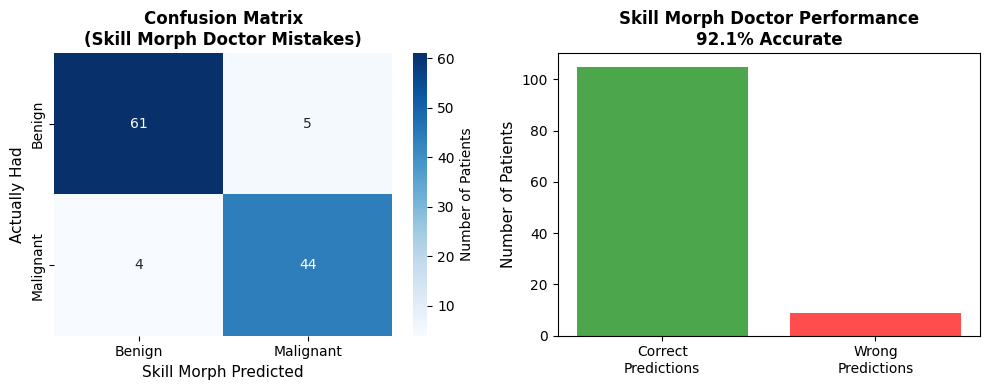

In [28]:
# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=7,  # Keep it simple - not too complex
    random_state=20
)

# Train the model
skillmorph_doctor.fit(X_train, y_train)

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

# Show some predictions vs reality with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:17} | {confidence:8.1f}%  | {correct}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

# **Max depth = 8**


Skill Morph Doctor Accuracy: 0.912 (91.2%)
GOOD! Our Skill Morph doctor performs well!

Let's check some predictions with confidence:
Patient | Actual      | Skill Morph Predicted | Confidence | Correct?
----------------------------------------------------------------------
      1 | Benign      | Benign            |    100.0%  | ✅
      2 | Malignant   | Malignant         |    100.0%  | ✅
      3 | Malignant   | Malignant         |    100.0%  | ✅
      4 | Benign      | Benign            |    100.0%  | ✅
      5 | Malignant   | Malignant         |    100.0%  | ✅
      6 | Malignant   | Malignant         |    100.0%  | ✅
      7 | Malignant   | Malignant         |    100.0%  | ✅
      8 | Benign      | Benign            |    100.0%  | ✅
      9 | Benign      | Malignant         |    100.0%  | ❌
     10 | Malignant   | Malignant         |    100.0%  | ✅


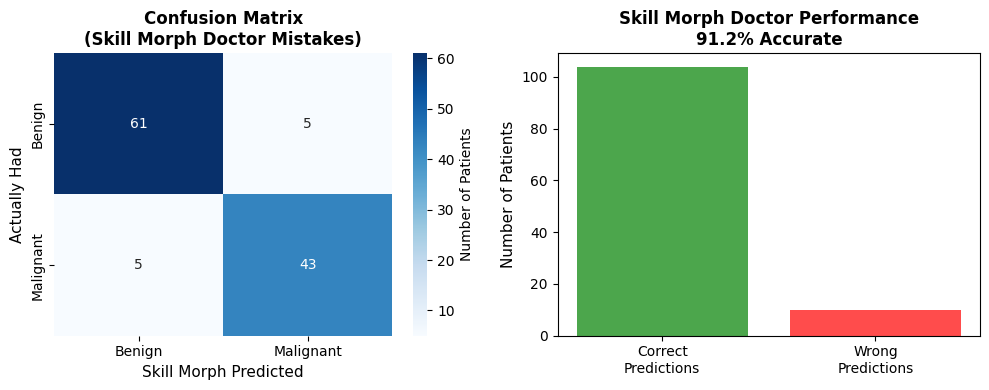

In [29]:
# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=8,  # Keep it simple - not too complex
    random_state=20
)

# Train the model
skillmorph_doctor.fit(X_train, y_train)

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

# Show some predictions vs reality with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:17} | {confidence:8.1f}%  | {correct}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

# **Max depth = 9**


Skill Morph Doctor Accuracy: 0.912 (91.2%)
GOOD! Our Skill Morph doctor performs well!

Let's check some predictions with confidence:
Patient | Actual      | Skill Morph Predicted | Confidence | Correct?
----------------------------------------------------------------------
      1 | Benign      | Benign            |    100.0%  | ✅
      2 | Malignant   | Malignant         |    100.0%  | ✅
      3 | Malignant   | Malignant         |    100.0%  | ✅
      4 | Benign      | Benign            |    100.0%  | ✅
      5 | Malignant   | Malignant         |    100.0%  | ✅
      6 | Malignant   | Malignant         |    100.0%  | ✅
      7 | Malignant   | Malignant         |    100.0%  | ✅
      8 | Benign      | Benign            |    100.0%  | ✅
      9 | Benign      | Malignant         |    100.0%  | ❌
     10 | Malignant   | Malignant         |    100.0%  | ✅


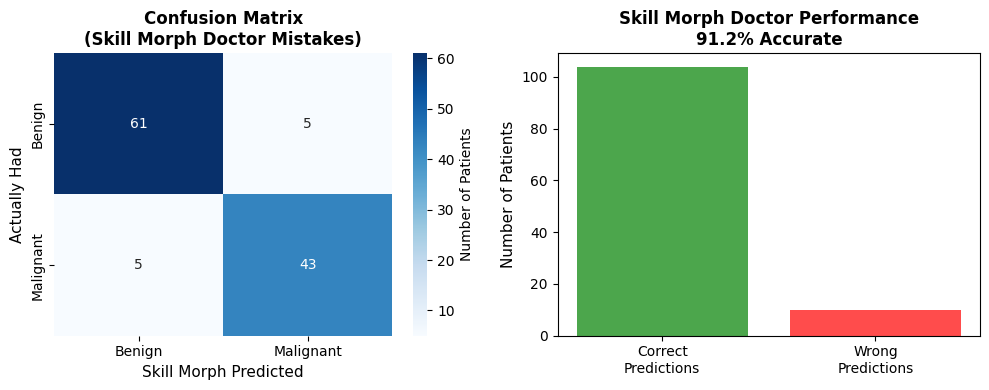

In [30]:
# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=9,  # Keep it simple - not too complex
    random_state=20
)

# Train the model
skillmorph_doctor.fit(X_train, y_train)

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

# Show some predictions vs reality with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:17} | {confidence:8.1f}%  | {correct}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()